<a href="https://colab.research.google.com/github/frank-morales2020/MLxDL/blob/main/BEC_AAI_DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://en.wikipedia.org/wiki/Satyendra_Nath_Bose

--- Starting Agentic BEC Analysis ---


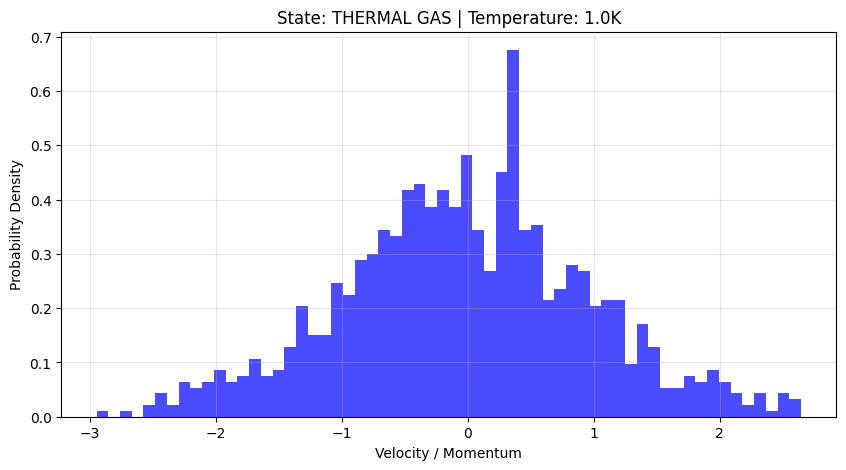


--- Model: gemini-3-flash-preview | Level: HIGH ---
🧠 THOUGHTS:
**Thermal Gas vs. Bose-Einstein Condensate: Analysis of a Boson Gas at 1.0K**

Okay, so I've got this histogram from the Quantum Physics Agent, a boson gas at 1.0K. My goal is to determine if this is a standard thermal gas or if we're seeing the beginnings of a Bose-Einstein Condensate (BEC).  I need to be very precise here.

First off, the Agent's title *already* states "THERMAL GAS." Hmm, that's almost *too* easy. Let's see if the image aligns with that. The x-axis is velocity or momentum, ranging from about -3 to 3, and the y-axis is probability density.  It's a pretty broad distribution, almost Gaussian.  It reminds me a little bit of a Maxwell-Boltzmann distribution, which is what I'd *expect* for a thermal gas.  I can see some statistical noise, but that's normal.

Now, a key feature of a BEC is the bimodal distribution – a broad thermal background *and* a really sharp spike at zero velocity. That represents the mac

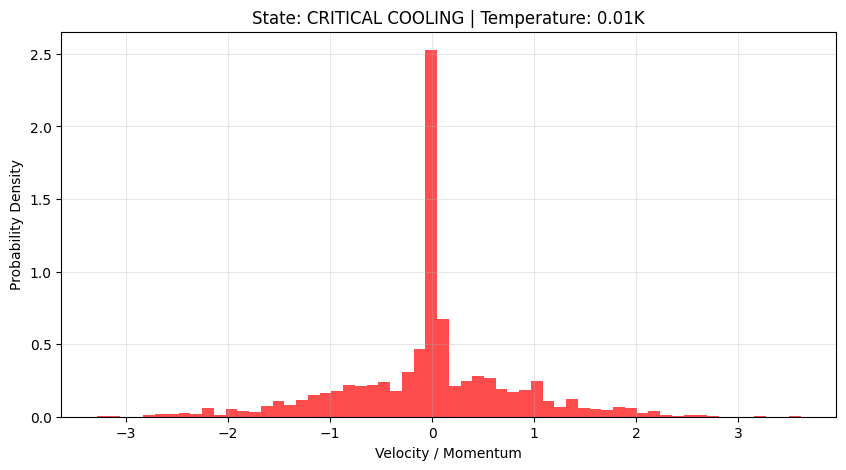


--- Model: gemini-3-flash-preview | Level: HIGH ---
🧠 THOUGHTS:
**Analysis of the Bose-Einstein Condensate Histogram**

Okay, here's my breakdown of this histogram. I'm given a histogram representing a boson gas at 0.01K, and the goal is to determine if a Bose-Einstein Condensate (BEC) has formed. Right off the bat, the title "CRITICAL COOLING" and the low temperature are big hints.

First, I examine the image. The x-axis is velocity or momentum, which makes sense for studying this kind of system, and the y-axis is probability density.  I'm looking at the shape of the data. I see a broad, low-profile distribution from around -3 to 3. That's the thermal component, the "gas" part of the system. Then, there's a really prominent, narrow, and tall peak right at zero velocity/momentum. It's significantly higher than the thermal background— maybe ten times taller. That's a huge density difference.

Now, I'm thinking about the physics involved. A classical gas would just show a single broad, 

In [5]:
import os
import io
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google import genai
from google.genai import types

# 1. Setup the Gemini 3 Flash Client
try:
    from google.colab import userdata
    GEMINI_API_KEY = userdata.get('GEMINI')
except (ImportError, KeyError):
    # Fallback for local environments
    GEMINI_API_KEY = os.environ.get("GEMINI_API_KEY")

client = genai.Client(api_key=GEMINI_API_KEY)
MODEL_ID = "gemini-3-flash-preview"

# 2. Physics Simulation: Generate BEC Visual Data
def generate_bec_visual(temp):
    """
    Simulates the velocity distribution transition.
    Displays the plot with plt.show() and returns an in-memory image object.
    """
    plt.figure(figsize=(10, 5))

    # Simulate Velocity Distribution
    # High Temp: Broad Gaussian | Low Temp: Sharp Spike (Condensate) + Broad Base (Thermal)
    thermal_component = np.random.normal(0, 1.0, 1000)

    # Critical Temperature (Tc) threshold set to 0.2K for demo
    if temp < 0.2:
        # N0/N = 1 - (T/Tc)^3
        condensate_size = int(500 * (1 - (temp/0.2)**3))
        condensate_component = np.random.normal(0, 0.05, condensate_size)
        data = np.concatenate([thermal_component, condensate_component])
        color = 'red'
        status = "CRITICAL COOLING"
    else:
        data = thermal_component
        color = 'blue'
        status = "THERMAL GAS"

    plt.hist(data, bins=60, color=color, alpha=0.7, density=True)
    plt.title(f"State: {status} | Temperature: {temp}K")
    plt.xlabel("Velocity / Momentum")
    plt.ylabel("Probability Density")
    plt.grid(alpha=0.3)

    # Capture plot to in-memory buffer (No PNG files saved to disk)
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)

    # Display the plot
    plt.show()
    plt.close() # Free memory

    return Image.open(buf)

# 3. Agentic Analysis Wrapper (User Implementation)
def demo_gemini_3_flash(image_input, temp, thinking_level="high"):
    """
    Analyzes the quantum state using Gemini 3 Flash's reasoning capabilities.
    """
    print(f"\n--- Model: {MODEL_ID} | Level: {thinking_level.upper()} ---")

    prompt = (
        f"You are a Quantum Physics Agent. This histogram represents a boson gas at {temp}K. "
        "Analyze the distribution: Is it unimodal (gas) or bimodal (condensate)? "
        "Identify if a sharp central 'spike' has emerged. Provide your verdict on whether "
        "a Bose-Einstein Condensate has formed."
    )

    config = types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_level=thinking_level,
            include_thoughts=True  # Returns the model's internal reasoning
        )
    )

    # Send text and the captured image
    response = client.models.generate_content(
        model=MODEL_ID,
        contents=[prompt, image_input],
        config=config
    )

    # Parsing the Response
    for part in response.candidates[0].content.parts:
        if part.thought:
            print(f"🧠 THOUGHTS:\n{part.text}\n")
        else:
            print(f"✅ RESPONSE:\n{part.text}")

# 4. Run the Simulation Experiment
print("--- Starting Agentic BEC Analysis ---")

# Test for Thermal Gas (1.0K) and Condensate (0.01K)
for t in [1.0, 0.01]:
    sim_image = generate_bec_visual(t)
    demo_gemini_3_flash(sim_image, t, thinking_level="high")